## Time domain representation of LTI systems

For the LTI systems described by the following difference equations, generate its impulse response, and unit step response. Comment on the properties of the system (Stable, Causal, ...)

 <ol>
  <li>$y[n] − 0.5y[n − 1] + 0.25y[n − 2] = 0.5x[n] + 0.2x[n − 1] + 0.2x[n − 2]$  </li>
 <li>$y[n] = 0.77y[n − 1] + x[n] + x[n − 1]$  </li>
  <li>$y[n] = 0.77y[n − 1] + 0.77x[n] + x[n − 1]$ </li>
</ol>

(use function <i>scipy.signal.dimpulse</i> to determine the impulse response and <i>scipy.signal.lfilter</i> to find the
output)



Details about <i>scipy.signal.lfilter</i> can be found here, https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.signal.lfilter.html#scipy.signal.lfilter

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.signal as sig
import warnings 
warnings.filterwarnings("ignore")

---
1. $y[n] − 0.5y[n − 1] + 0.25y[n − 2] = 0.5x[n] + 0.2x[n − 1] + 0.2x[n − 2]$ 

Transfer function would be, <br>
$H[z] = \frac{Y[z]}{X[z]} = \frac{(0.5 + 0.2z^{-1} + 0.2z^{-2})}{(1 - 0.5z^{-1} + 0.25z^{-2})}$

**2 poles at z = 0.5**

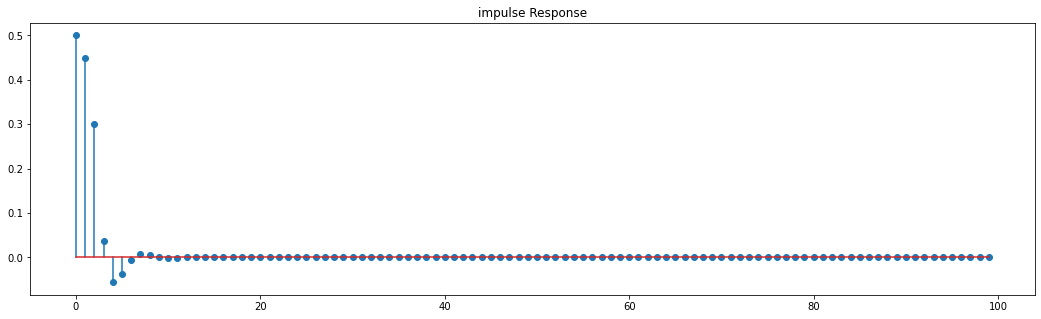

In [24]:
x = np.zeros(100,)
x[0] = 1
#impulse_response = sig.lfilter(b = [0.5, 0.2, 0.2], a = [1, -0.5, 0.25], x = x) # x is [1, 0, 0,] impulse
impulse_response = sig.dimpulse(([0.5, 0.2, 0.2], [1, -0.5, 0.25], 1))

plt.figure(figsize = (18, 5))
#plt.stem(impulse_response)
plt.stem(impulse_response[0], impulse_response[1][0])
plt.title('impulse Response')
plt.show()

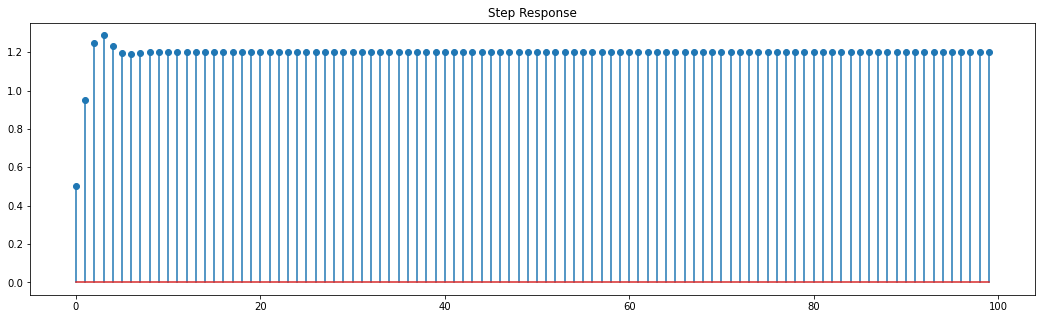

In [27]:
step_response = sig.lfilter(b = [0.5, 0.2, 0.2], a = [1, -0.5, 0.25], x = np.ones((100,))) # x is  step

plt.figure(figsize = (18, 5))
plt.stem(step_response)
plt.title('Step Response')
plt.show()

Signal is 
1. Stable
2. Causal 
---

2. $y[n] = 0.77y[n − 1] + x[n] + x[n − 1]$

$H[z] = Y[z] / X[z] = (1 + 1z^-1) / (1 - 0.77 z ^ -1)$

**1 pole at z = 0.77**

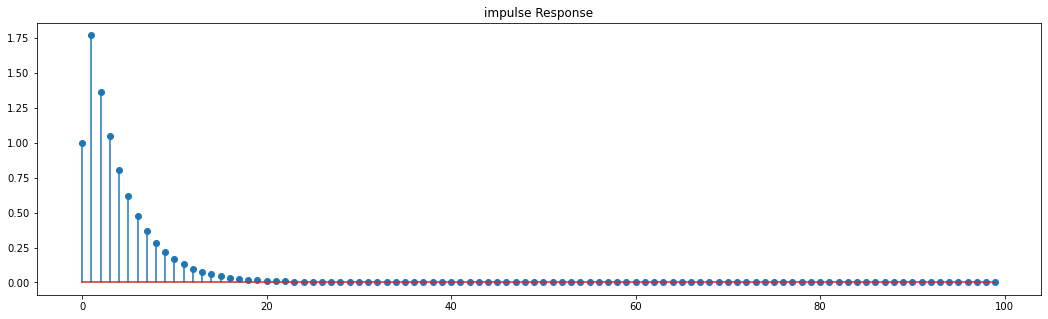

In [29]:
impulse_response = sig.lfilter(b = [1, 1], a = [1, -0.77], x = x)

plt.figure(figsize = (18, 5))
plt.stem(impulse_response)
plt.title('impulse Response')
plt.show()

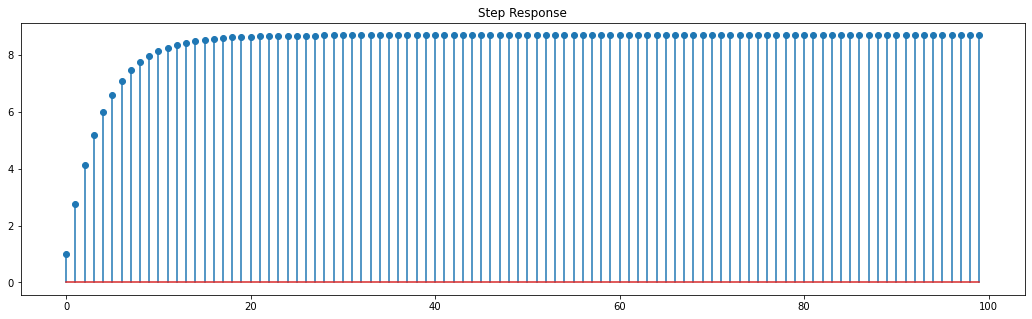

In [30]:
step_response = sig.lfilter([1, 1], [1, -0.77], x = np.ones((100,))) # x is  step

plt.figure(figsize = (18, 5))
plt.stem(step_response)
plt.title('Step Response')
plt.show()

Signal is 
1. Stable
2. Causal 
---

3. $y[n] = 0.77y[n − 1] + 0.77x[n] + x[n − 1]$

**1 pole at z = 0.77**

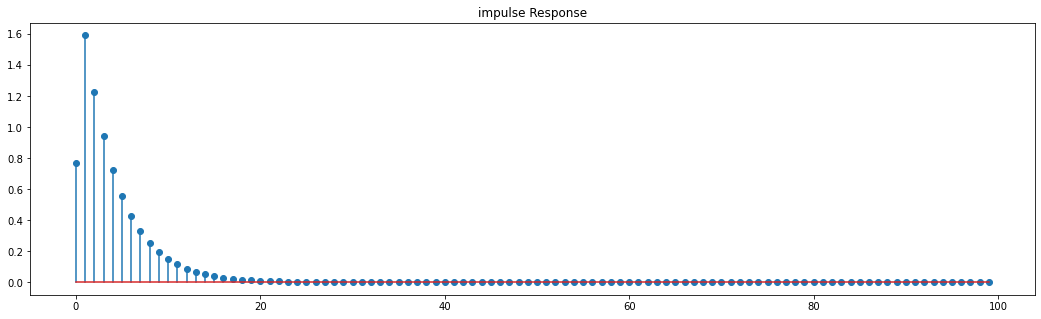

In [34]:
impulse_response = sig.lfilter(b = [0.77, 1], a = [1, -0.77], x = x)

plt.figure(figsize = (18, 5))
plt.stem(impulse_response)
plt.title('impulse Response')
plt.show()

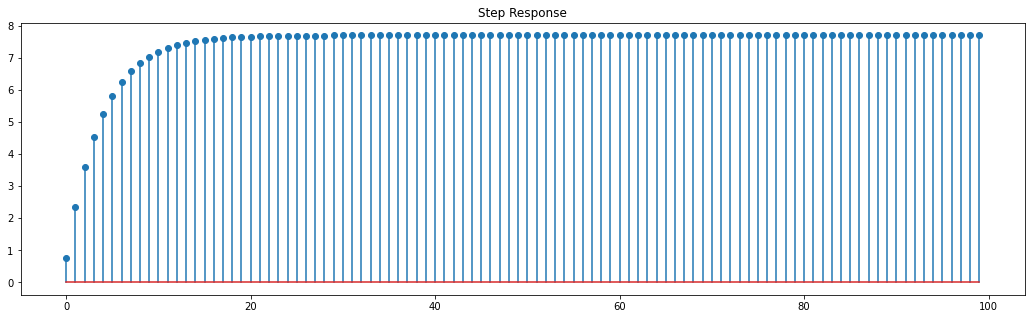

In [35]:
step_response = sig.lfilter([0.77, 1], [1, -0.77], x = np.ones((100,))) # x is  step

plt.figure(figsize = (18, 5))
plt.stem(step_response)
plt.title('Step Response')
plt.show()

Signal is

1. Stable
2. Causal

----

Plot the response of the following filters if the input is 
<ul>
  <li>$x[n] = 0.1n + sin(0.1nπ);    0 ≤ n ≤ 60 $  </li>
 <li>$ x[n] = 0.1n + sin(0.1nπ) + w[n];     0 ≤ n ≤ 60;$  </li> 
</ul> $w[n]$ is zero mean uniformly distributed random noise in $[−0.5\,\,  0.5]$.
<ol>
    <li> $y[n] = \frac{1}{4} \sum_{k=0}^3  x[n − k]$ </li>
    <li>$y[n] = \frac{2}{N(N+1)} \sum_{k=0}^{N−1}(N − k)x[n − k]; N = 4$ </li>
    <li>$y[n] − αy[n − 1] = (1 − α)x[n]; α = 3/4 $ </li>
</ol>
    
(use function <i>rand</i> to generate random noise)  https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.rand.html

 <i>uniform</i>  https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.random.uniform.html

In [36]:
n = np.arange(61)

In [45]:
wn = np.random.uniform(-0.5, 0.5, 60)

"""plt.plot(wn)
plt.title('w[n]')
plt.show()"""

print("Mean: {}, var: {}".format(np.mean(wn), np.std(wn)**2))

Mean: -0.038462619409545054, var: 0.5253333856410347


1. $y[n] = \frac{1}{4} \sum_{k=0}^3  x[n − k]$
<br> where $x[n]$ is given as <br>
$x[n] = 0.1n + sin(0.1nπ);    0 ≤ n ≤ 60 $

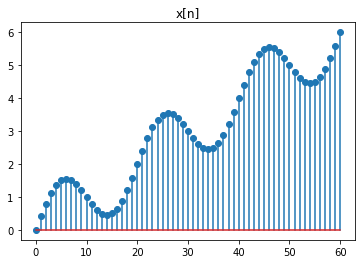

In [38]:
x = 0.1*(n) + np.sin(0.1*n*np.pi)

plt.stem(n, x)
plt.title('x[n]')
plt.show()

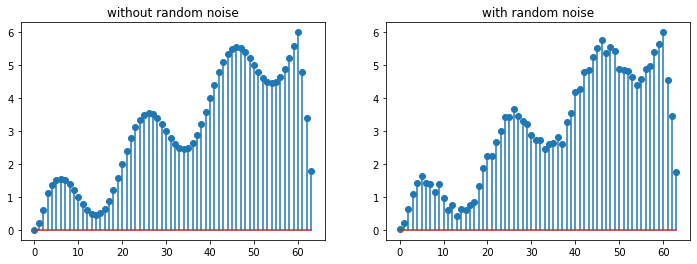

In [46]:
def get_xn(n, k, noise_flag=False):
    t = n + k 
    #t[t<0] = 0
    x = 0.1*(t) + np.sin(0.1*t*np.pi)
    #print(t)
    #print(x)
    if noise_flag==True:
        wn = np.random.uniform(-0.5, 0.5, 61)
        return x+wn
    return x

y = np.zeros((64, ))
for i in range(4):
    y[i:i+61] += 0.25 * get_xn(n, i)
    
y_noisy = np.zeros((64, ))
for i in range(4):
    y_noisy[i:i+61] += 0.25 * get_xn(n, i, noise_flag=True)

#print(y)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.stem(y)
plt.title('without random noise')

plt.subplot(122)
plt.stem(y_noisy)
plt.title('with random noise')
plt.show()

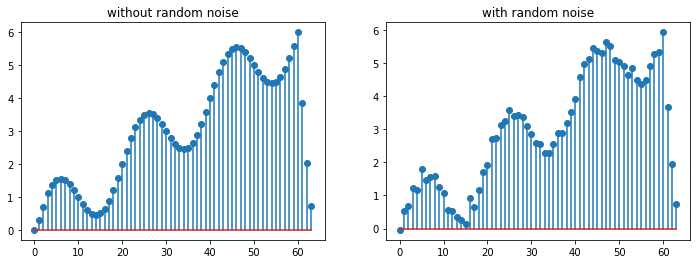

In [48]:
N=4
y2 = np.zeros((64, ))
for i in range(4):
    y2[i:i+61] += (2/(N*(N+1)))*(N-i)*get_xn(n, i)

y2_noisy = np.zeros((64, ))
for i in range(4):
    y2_noisy[i:i+61] += (2/(N*(N+1)))*(N-i)*get_xn(n, i, noise_flag=True)

#print(y)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.stem(y2)
plt.title('without random noise')

plt.subplot(122)
plt.stem(y2_noisy)
plt.title('with random noise')
plt.show()

<li>$y[n] − αy[n − 1] = (1 − α)x[n]; α = 3/4 $ </li>

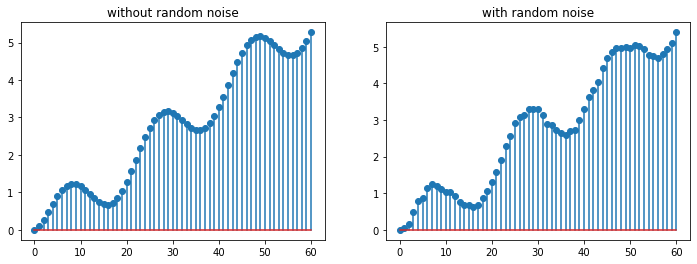

In [49]:
y3=[0]
wn = np.random.uniform(-0.5, 0.5, 61)

for i in range(1,len(x)):
    y3.append(0.75*y3[i-1]+0.25*x[i])

y3_noisy=[0]
for i in range(1,len(x)):
    y3_noisy.append(0.75*y3_noisy[i-1]+0.25*(x[i]+wn[i]))


    
#print(y)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.stem(y3)
plt.title('without random noise')

plt.subplot(122)
plt.stem(y3_noisy)
plt.title('with random noise')
plt.show()

---

Consider a round theatre where an orchestra is in the middle of two concentric circles and the walls on one half side are at a radial distances of $17.15m$ (inner circle) and $34.3m$ (outer circle) on the other side from the
orchestra. The speed of sound is $343 m/s$. Assume that the recorded signal is the sum of the original signal and the attenuated echoes from the two walls and is given by $r[n] = y[n] + 0.8y[n − N1] + 0.6y[n − N2]$ where,
$N1$ is the delay caused by the closest wall and N2 is the delay caused by the farther wall. The recorder is in the centre of the theatre. Take any audio signal available and generate $r[n]$ and listen to both the original and
the echoed signal.

In [50]:
N1 = np.round(17.15/343, 2) #sec
N2 = np.round(34.3/343, 2) #

print(2*N1, 2*N2)

0.1 0.2


In [56]:
import scipy.io.wavfile as wav
rate, data = wav.read('brown_fox.wav')
data.shape

(133280, 2)

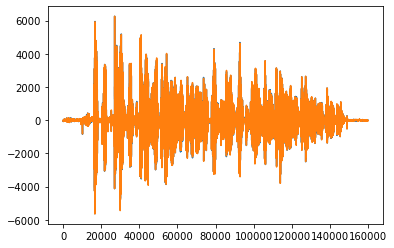

In [57]:
n = len(data)
# echo signal 
echo=np.zeros((int(n*1.2),2))                       
echo[:n] = data
echo[int(0.1*n):int(n*1.1)] += 0.8*data  
echo[int(0.2*n):] += 0.6*data

plt.plot(echo)

In [58]:
wav.write('echo.wav', 16000, echo)

---

Generate the signal $x[n] = sin(0.1\pi n)$,  $0 \leq n \leq 499$. Add uniform random
noise (with amplitude 1 and mean 0) to obtain a noisy signal $s[n]$. Plot
each signal and check if you can identify any periodicity in the waveforms.
<ol>
    <li> Obtain the autocorrelation r[n] of s[n] and plot. </li>
    <li> Generate a impulse train $i[n] = \sum_{k} \delta[n−kN];0 ≤ n ≤ 499, N=10 $. Find the cross correlation y[n] of s[n] and i[n]. Choose a normalising factor such that the peak value of y[n] is 1.
</ol>
        

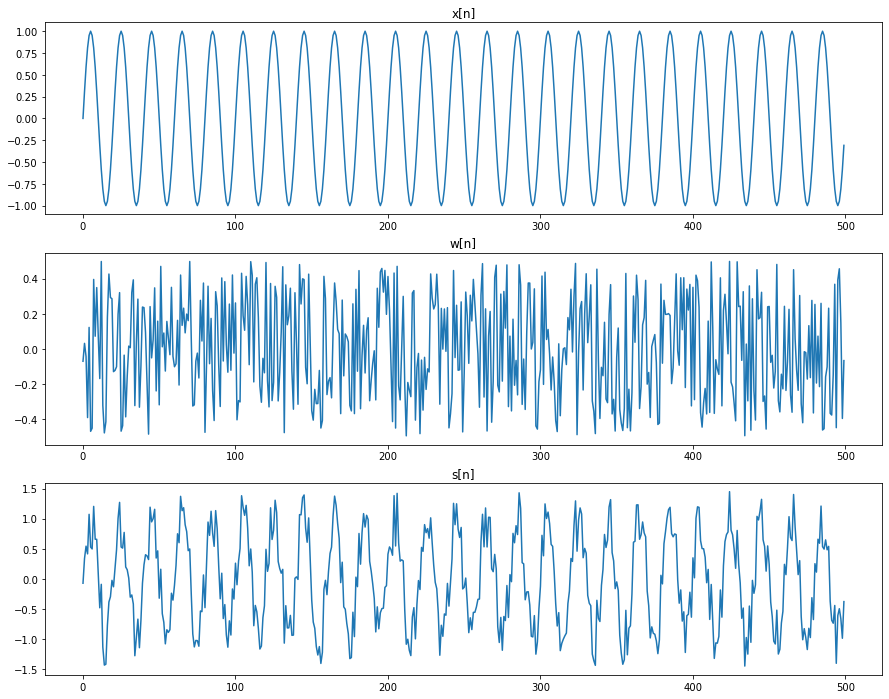

In [16]:
n = np.arange(500)
wn = np.random.uniform(-0.5, 0.5, 500)

xn = np.sin(0.1*np.pi*n)

sn = xn + wn

plt.figure(figsize = (15, 12))
plt.subplot(311)
plt.plot(xn)
plt.title('x[n]')

plt.subplot(312)
plt.plot(wn)
plt.title('w[n]')

plt.subplot(313)
plt.plot(sn)
plt.title('s[n]')

plt.show()

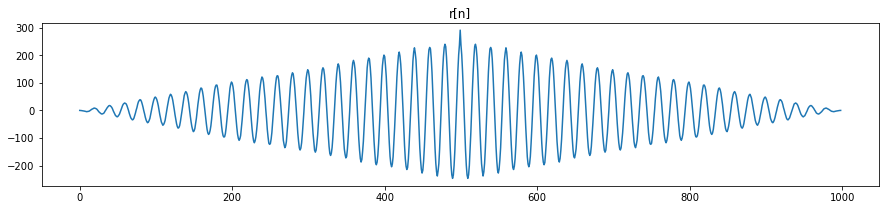

In [17]:
rn = sig.correlate(sn, sn)

plt.figure(figsize = (15, 3))
plt.plot(rn)
plt.title('r[n]')
plt.show()

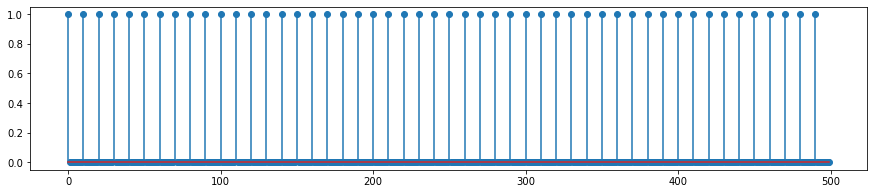

In [18]:
In = np.zeros((500, ))
for i in range(0, 500, 10):
    In[i] = 1

plt.figure(figsize = (15, 3))
plt.stem(In)
plt.show()

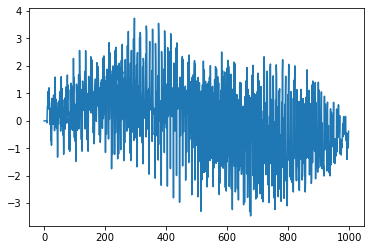

In [19]:
yn = sig.correlate(sn, In)

plt.plot(yn)
plt.show()

In [27]:
print("Max of yn: {:0.2f}".format(max(yn)))

Max of yn: 3.74


<b>Discrete Envelope detector:</b>  Let the amplitude modulated input to the envelope detector be a sampled signal $x(nTs) = p(nTs)cos(20πnTs)$, where $p(nTs) = u(nTs)−u(nTs −20Ts)+u(nTs −40Ts)−u(nTs −60Ts)$. Choose $Ts = 0.01s$. 
<ol>
    <li> Generate 100 samples and plot it.</li> 
    <li> Compute and plot the absolute value of the signal $y(nTs) =  \mid x(nTs)\mid$ (This is performed by
the diode circuit in case of analog demodulator). </li>
    <li> Low pass filter the sequence $y(nTs)$ by convolving with a moving average filter of the order 15. (The impuse response is $\frac{1}{15}(u[n] − u[n − 15])$. (This is equivalent to the RC low pass filter in analog system). Plot the results. Is the discrete envelope detector a linear system?


In [3]:
n = np.linspace(0, 1, num = 100)
Ts = 0.01
t = n*Ts

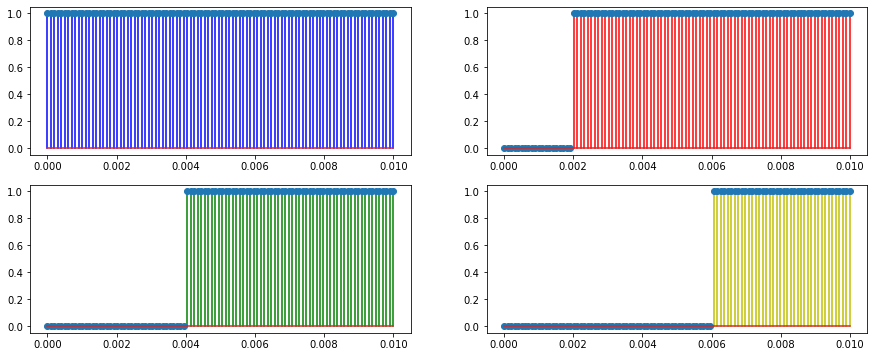

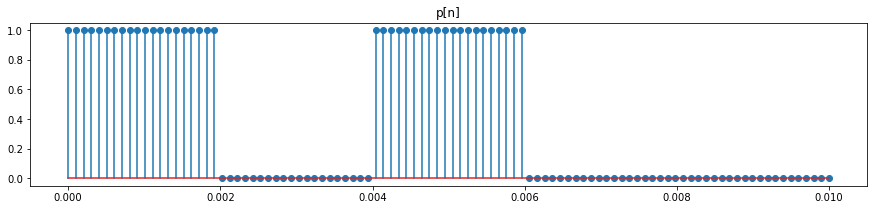

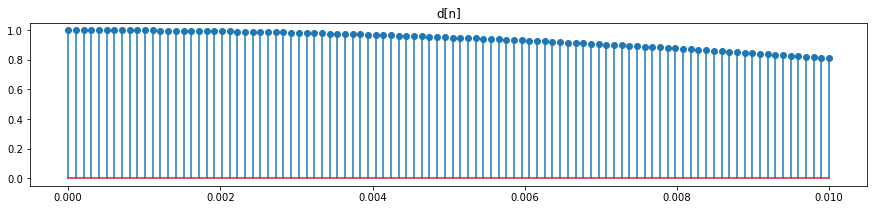

In [6]:
un1 = np.ones((len(t), 1))
un2 = np.concatenate((np.zeros((20, 1)), np.ones((80, 1))))
un3 = np.concatenate((np.zeros((40, 1)), np.ones((60, 1))))
un4 = np.concatenate((np.zeros((60, 1)), np.ones((40, 1))))

plt.figure(figsize=(15, 6))
plt.subplot(221)
plt.stem(t, un1, 'b')
plt.subplot(222)
plt.stem(t, un2, 'r')
plt.subplot(223)
plt.stem(t, un3, 'g')
plt.subplot(224)
plt.stem(t, un4, 'y')
plt.show()

pn = un1 - un2 + un3 - un4
plt.figure(figsize=(15, 3))
plt.stem(t, pn)
plt.title('p[n]')
plt.show()

dn = np.cos(20*np.pi*t).reshape((100, 1))
plt.figure(figsize=(15, 3))
plt.stem(t, dn)
plt.title('d[n]')
plt.show()

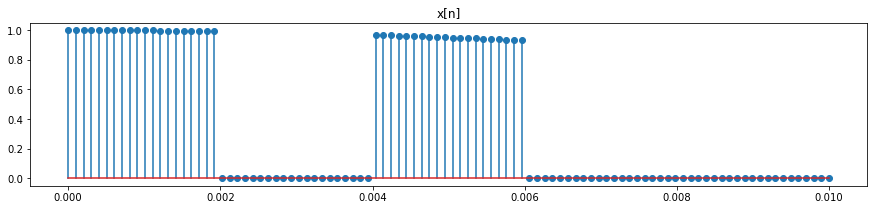

In [11]:
xn = pn*np.cos(20*np.pi*t).reshape((100, 1))

plt.figure(figsize=(15, 3))
plt.stem(t, xn)
plt.title('x[n]')
plt.show()

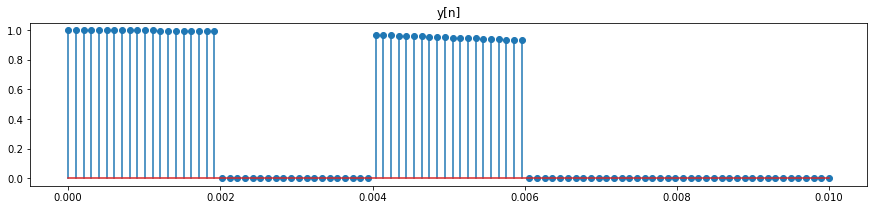

In [12]:
plt.figure(figsize=(15, 3))
plt.stem(t, np.abs(xn))
plt.title('y[n]')
plt.show()

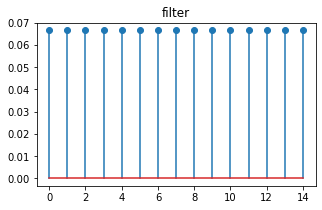

In [13]:
moving_avg = (1./15)*np.ones((15, 1))

plt.figure(figsize=(5, 3))
plt.stem(moving_avg)
plt.title('filter')
plt.show()

In [14]:
conv_output = sig.convolve(np.abs(xn), moving_avg)

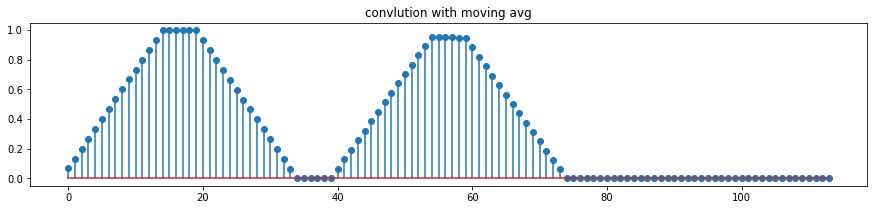

In [15]:
plt.figure(figsize=(15, 3))
plt.stem(conv_output)
plt.title('convlution with moving avg')
plt.show()